# Linear Programming

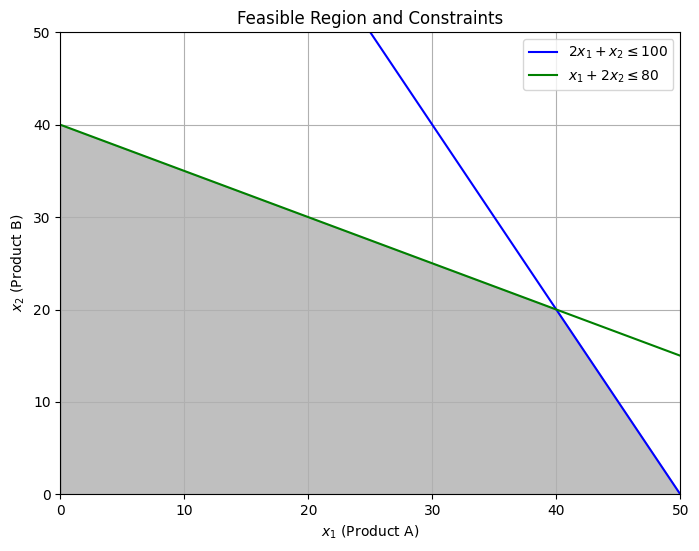

In [1]:
import numpy as np
import matplotlib.pyplot as plt

labor_constraint_coeff = [2, 1]
material_constraint_coeff = [1, 2]
labor_limit = 100
material_limit = 80

objective_coeff = [40, 30]

x1 = np.linspace(0, 50, 400)

x2_labor = (labor_limit - labor_constraint_coeff[0] * x1) / labor_constraint_coeff[1]
x2_material = (material_limit - material_constraint_coeff[0] * x1) / material_constraint_coeff[1]

plt.figure(figsize=(8, 6))
plt.plot(x1, x2_labor, label=r'$2x_1 + x_2 \leq 100$', color='blue')
plt.plot(x1, x2_material, label=r'$x_1 + 2x_2 \leq 80$', color='green')

plt.fill_between(x1, np.minimum(x2_labor, x2_material), where=(x1 >= 0) & (np.minimum(x2_labor, x2_material) >= 0), 
                 color='gray', alpha=0.5)

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

plt.xlim((0, 50))
plt.ylim((0, 50))
plt.xlabel(r'$x_1$ (Product A)')
plt.ylabel(r'$x_2$ (Product B)')
plt.title('Feasible Region and Constraints')
plt.legend()

plt.grid(True)

plt.savefig('../content/vis/linear_programming.png', dpi=300)

plt.show()


In [4]:
import pulp

# Initialize the problem
prob = pulp.LpProblem("Maximize Profit", pulp.LpMaximize)

# Define decision variables
x1 = pulp.LpVariable('x1', lowBound=0, cat='Continuous')  # Product A
x2 = pulp.LpVariable('x2', lowBound=0, cat='Continuous')  # Product B

# Objective function: Maximize 40*x1 + 30*x2
prob += 40 * x1 + 30 * x2, "Total Profit"

# Constraints
prob += 2 * x1 + x2 <= 100, "Labor Constraint"
prob += x1 + 2 * x2 <= 80, "Material Constraint"

# Solve the problem
prob.solve()

# Print the results
print("Status:", pulp.LpStatus[prob.status])
print(f"Optimal x1 (Product A): {pulp.value(x1)}")
print(f"Optimal x2 (Product B): {pulp.value(x2)}")
print(f"Maximum Profit: {pulp.value(prob.objective)}")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/vb/Documents/Github/SCM/.venv/lib/python3.12/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/gb/qpmlzbms1xg5h5tb31c2z73r0000gn/T/a8dea900d410433e965bc07340d1cfcb-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/gb/qpmlzbms1xg5h5tb31c2z73r0000gn/T/a8dea900d410433e965bc07340d1cfcb-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 18 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
0  Obj -0 Dual inf 70 (2)
0  Obj -0 Dual inf 70 (2)
2  Obj 2200
Optimal - objective value 2200
Optimal objective 2200 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock

# Integer Programming

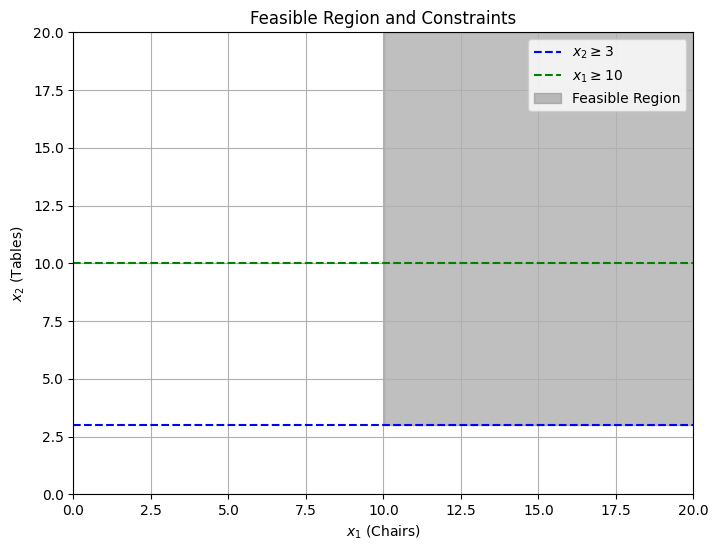

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the constraints
x1 = np.linspace(0, 20, 400)  # Extend the range to show feasible area clearly

# Constraints: x1 >= 10 and x2 >= 3
x2_min_chairs = np.full_like(x1, 3)
x2_min_tables = np.full_like(x1, 10)

# Feasible region for x2 when x1 >= 10
x1_feasible = x1[x1 >= 10]
x2_feasible = np.full_like(x1_feasible, 3)

plt.figure(figsize=(8, 6))

# Plot constraints
plt.plot(x1, x2_min_chairs, label=r'$x_2 \geq 3$', color='blue', linestyle='--')
plt.plot(x1, x2_min_tables, label=r'$x_1 \geq 10$', color='green', linestyle='--')

# Fill the feasible region
plt.fill_between(x1_feasible, x2_feasible, 20, where=(x1_feasible >= 10) & (x2_feasible >= 3), 
                 color='gray', alpha=0.5, label='Feasible Region')

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.xlim((0, 20))
plt.ylim((0, 20))
plt.xlabel(r'$x_1$ (Chairs)')
plt.ylabel(r'$x_2$ (Tables)')
plt.title('Feasible Region and Constraints')
plt.legend()

plt.grid(True)

plt.savefig('integer_programming_example.png', dpi=300)

plt.show()


In [10]:
import pulp

# Define the problem
prob = pulp.LpProblem("Event_Cost_Minimization", pulp.LpMinimize)

# Define the decision variables
x1 = pulp.LpVariable('x1', lowBound=10, cat='Integer')  # Number of chairs, must be at least 10
x2 = pulp.LpVariable('x2', lowBound=3, cat='Integer')   # Number of tables, must be at least 3

# Define the objective function
prob += 5 * x1 + 20 * x2  # Minimize cost

# Define the budget constraint
prob += 5 * x1 + 20 * x2 <= 100  # Total cost should not exceed $100

# Check the constraints before solving
print("Constraints:")
for constraint in prob.constraints.values():
    print(constraint)

# Solve the problem
prob.solve()

# Print the results
print("Status:", pulp.LpStatus[prob.status])
print("Number of chairs (x1):", pulp.value(x1))
print("Number of tables (x2):", pulp.value(x2))
print("Total Cost:", pulp.value(prob.objective))


Constraints:
5*x1 + 20*x2 <= 100
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/vb/Documents/Github/SCM/.venv/lib/python3.12/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/gb/qpmlzbms1xg5h5tb31c2z73r0000gn/T/d9c6a8391aac44f5b855362f7f3be192-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/gb/qpmlzbms1xg5h5tb31c2z73r0000gn/T/d9c6a8391aac44f5b855362f7f3be192-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 6 COLUMNS
At line 15 RHS
At line 17 BOUNDS
At line 20 ENDATA
Problem MODEL has 1 rows, 2 columns and 2 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Problem is infeasible - 0.00 seconds
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00

Status: Infeasible
Number of chairs (x1): 10.0
Number of tables (x2): 3.0
Total Cost: 110.0


# Mixed Integer Programming

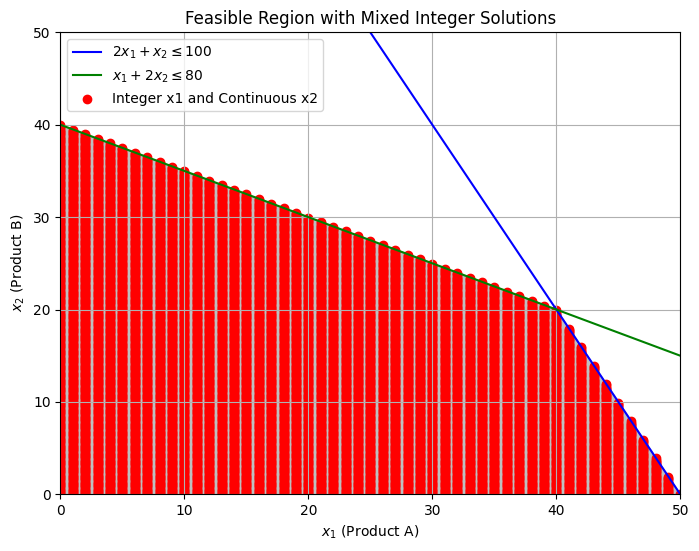

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the coefficients of the constraints
labor_constraint_coeff = [2, 1]
material_constraint_coeff = [1, 2]
labor_limit = 100
material_limit = 80

# Create a grid of x1 values (integers) and x2 values (continuous)
x1 = np.arange(0, 51, 1)
x2 = np.linspace(0, 50, 400)

# Calculate the corresponding x2 values for the constraints
x2_labor = (labor_limit - labor_constraint_coeff[0] * x1) / labor_constraint_coeff[1]
x2_material = (material_limit - material_constraint_coeff[0] * x1) / material_constraint_coeff[1]

# Plot the feasible region
plt.figure(figsize=(8, 6))
plt.plot(x1, x2_labor, label=r'$2x_1 + x_2 \leq 100$', color='blue')
plt.plot(x1, x2_material, label=r'$x_1 + 2x_2 \leq 80$', color='green')

# Fill feasible region
plt.fill_between(x1, np.minimum(x2_labor, x2_material), where=(x1 >= 0) & (np.minimum(x2_labor, x2_material) >= 0), 
                 color='gray', alpha=0.5)

# Find integer x1 and continuous x2 within the feasible region
x1_int, x2_cont = [], []
for i in x1:
    for j in x2:
        if 2*i + j <= labor_limit and i + 2*j <= material_limit:
            x1_int.append(i)
            x2_cont.append(j)

# Plot integer x1 and continuous x2
plt.scatter(x1_int, x2_cont, color='red', marker='o', label='Integer x1 and Continuous x2')

# Highlight the axes
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Set axis limits and labels
plt.xlim((0, 50))
plt.ylim((0, 50))
plt.xlabel(r'$x_1$ (Product A)')
plt.ylabel(r'$x_2$ (Product B)')
plt.title('Feasible Region with Mixed Integer Solutions')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


# Non-Linear Programming

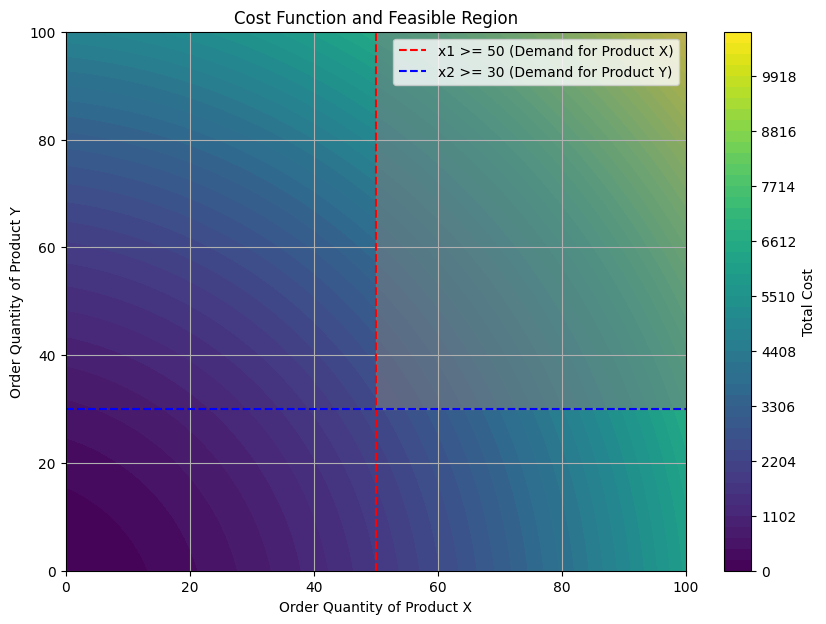

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the cost function
def cost_function(x1, x2):
    return 10 * x1 + 0.5 * x1**2 + 8 * x2 + 0.4 * x2**2

# Define the constraints
x1_min = 50
x2_min = 30

# Create a grid of x1 and x2 values
x1 = np.linspace(0, 100, 400)
x2 = np.linspace(0, 100, 400)
X1, X2 = np.meshgrid(x1, x2)
Z = cost_function(X1, X2)

# Plot the contour of the cost function
plt.figure(figsize=(10, 7))
contour = plt.contourf(X1, X2, Z, levels=np.linspace(Z.min(), Z.max(), 50), cmap='viridis')
plt.colorbar(contour, label='Total Cost')

# Plot the constraints
plt.axvline(x=x1_min, color='r', linestyle='--', label='x1 >= 50 (Demand for Product X)')
plt.axhline(y=x2_min, color='b', linestyle='--', label='x2 >= 30 (Demand for Product Y)')

# Highlight the feasible region
plt.fill_between(x1, x2_min, 100, where=(x1 >= x1_min), color='gray', alpha=0.3)
plt.fill_betweenx(x2, x1_min, 100, where=(x2 >= x2_min), color='gray', alpha=0.3)

# Add labels and title
plt.xlabel('Order Quantity of Product X')
plt.ylabel('Order Quantity of Product Y')
plt.title('Cost Function and Feasible Region')
plt.legend()
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid(True)

plt.show()


# Non Linear Programming

Optimal solution: [1.00000000e+00 1.66533454e-16]
Minimum value: 1.0000000000000022


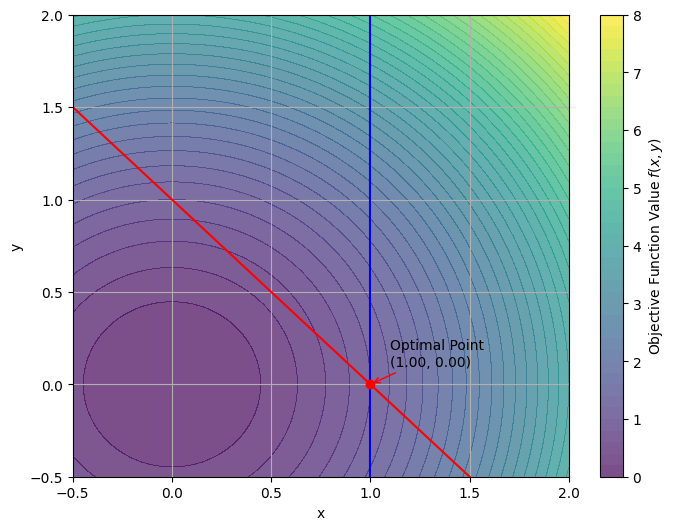

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Objective function
def objective(x):
    return x[0]**2 + x[1]**2  # f(x, y) = x^2 + y^2

# Constraints
def constraint1(x):
    return x[0] + x[1] - 1  # g1(x, y) = x + y - 1 >= 0

def constraint2(x):
    return x[0] - 1  # g2(x, y) = x >= 0

# Initial guess
x0 = np.array([0.5, 0.5])

# Define constraints in dictionary form
constraints = [{'type': 'ineq', 'fun': constraint1},
               {'type': 'ineq', 'fun': constraint2}]

# Perform minimization
result = minimize(objective, x0, constraints=constraints)

# Print results
print("Optimal solution:", result.x)
print("Minimum value:", result.fun)

# Plotting the objective function and constraints
x = np.linspace(-0.5, 2, 100)
y = np.linspace(-0.5, 2, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2  # Objective function values

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, levels=50, cmap='viridis', alpha=0.7)
plt.colorbar(label='Objective Function Value $f(x, y)$')
plt.xlabel('x')
plt.ylabel('y')

# Plot the constraints
plt.plot(x, 1 - x, label=r'$x + y \geq 1$', color='red')  # g1
plt.axvline(1, color='blue', label=r'$x \geq 0$')  # g2

# Plot the optimal solution
plt.plot(result.x[0], result.x[1], 'ro')  # Optimal point
plt.annotate(f'Optimal Point\n({result.x[0]:.2f}, {result.x[1]:.2f})',
             xy=result.x, xytext=(result.x[0]+0.1, result.x[1]+0.1),
             arrowprops=dict(arrowstyle='->', color='red'))

# plt.title('Minimization of Objective Function with Constraints')
# plt.legend()
plt.xlim(-0.5, 2)
plt.ylim(-0.5, 2)
plt.grid()

plt.savefig('../content/vis/non_linear_programming_linear_constraints.png', dpi=300)

plt.show()


Optimal solution: [0.5 0.5]
Minimum value: 0.5


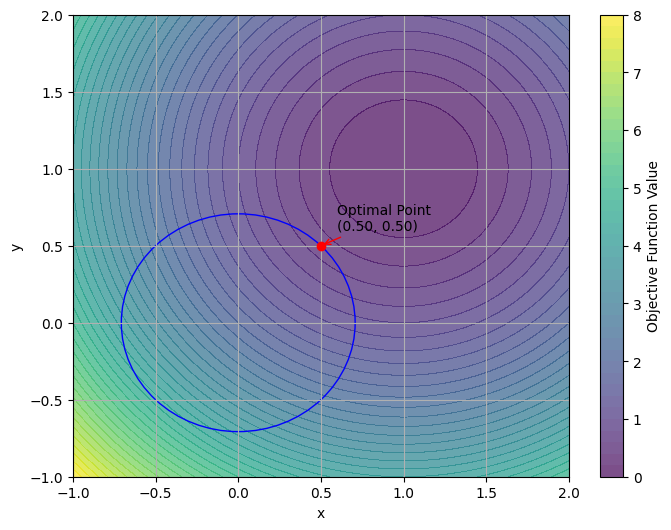

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Objective function
def objective(x):
    return (x[0] - 1)**2 + (x[1] - 1)**2  # f(x, y) = (x - 1)^2 + (y - 1)^2

# Constraints
def constraint2(x):
    return 0.5 - (x[0]**2 + x[1]**2)  # g2(x, y) = x^2 + y^2 <= 0.5

# Initial guess
x0 = np.array([0.5, 0.5])

# Define constraints in dictionary form
constraints = [
    {'type': 'ineq', 'fun': constraint2}
]

# Perform minimization
result = minimize(objective, x0, constraints=constraints)

# Print results
print("Optimal solution:", result.x)
print("Minimum value:", result.fun)

# Plotting the objective function and constraints
x = np.linspace(-1, 2, 100)
y = np.linspace(-1, 2, 100)
X, Y = np.meshgrid(x, y)
Z = objective((X, Y))

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, levels=50, cmap='viridis', alpha=0.7)
plt.colorbar(label='Objective Function Value')
plt.xlabel('x')
plt.ylabel('y')

# Plot the constraints
# plt.plot(x, 1 - x, label=r'$x + y \geq 1$', color='red')  # g1
circle = plt.Circle((0, 0), np.sqrt(0.5), color='blue', fill=False, label=r'$x^2 + y^2 \leq 0.5$')
plt.gca().add_artist(circle)

# Plot the optimal solution
plt.plot(result.x[0], result.x[1], 'ro')  # Optimal point
plt.annotate(f'Optimal Point\n({result.x[0]:.2f}, {result.x[1]:.2f})',
             xy=result.x, xytext=(result.x[0]+0.1, result.x[1]+0.1),
             arrowprops=dict(arrowstyle='->', color='red'))

# plt.legend()
plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.grid()

plt.savefig('../content/vis/non_linear_programming_non_linear_constraints.png', dpi=300)

plt.show()
